## Naive Bayes Classifier :

This classifier is simple, because it's basically just applying **Bayes's theorem** with class conditional independence assumptions among the features.

It still manages to work well finding applications in

- 1.Document classification :<br>
   - i. Spam filtering <br>
   - ii. Context based email routing <br>
- 2.Medical Diagnosis

In [2]:
# All needed imports
import pandas as pd
import numpy as np

# We need to demarcate(set the boundaries or limits of) the Training and Testing set
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab
import math # for sqrt
import scipy.stats # normal distribution
from sklearn.preprocessing import normalize
import seaborn as sn # Data visualization

df = pd.read_csv('iris.csv')

print(df.head())
print(df.tail())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

The Iris flower data set is a famous dataset, The data set contains 3 classes (three species of Iris - **Iris setosa, Iris virginica and Iris versicolor**) of 50 instances each. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

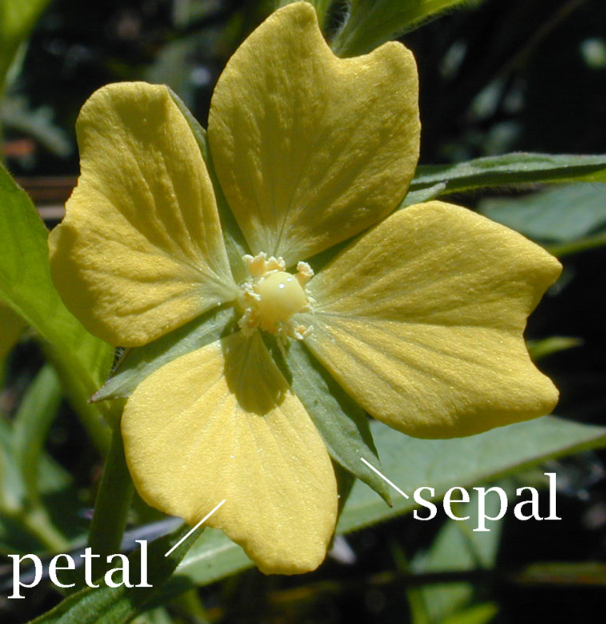

In [11]:
from IPython.display import Image
Image("n10.png")

So we have,

3 classes <br>

- Class 1 : Iris setosa <br>
- Class 2 : Iris virginica <br>
- Class 3 : Iris versicolor <br>

4 features (in cm) <br>

- Feature 1 : Sepal Length <br>
- Feature 2 : Sepal Width <br>
- Feature 3 : Petal Length <br>
- Feature 4 : Petal Width <br>


We have the **independent feature model** (we will derive below),

$${\displaystyle p(C_{k}\mid x_{1},\dots ,x_{n})={\frac {1}{p \left (\vec x \right )}}p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})}$$

## Class Priors :¶
So we need to estimate the **prior probability**, i.e. given a sample, no extra information whats the probability of it being class $C_i$?

$$p(C_i)\ \ \  \forall \ \  i \in \ [1,2,3]$$
This shows what our beliefs are before we take the "evidence" into account.

In [3]:
train, test = train_test_split(df, test_size = 0.2)

print(test.head())
print(train.head())

classPriors = {}

# Lets go with eqiprobable class priors - more accurate
classPriors[1] = 50/150
classPriors[2] = 50/150
classPriors[3] = 50/150

# Alternatively we could try estimating class priors from the training set
classCounts = train['Species'].value_counts()
totalCount = classCounts[0] + classCounts[1] + classCounts[2]
assert (totalCount == 120) # Cause 20% of 150 is test

#classPriors[1] = classCounts[1]/totalCount # Iris-setosa
#classPriors[2] = classCounts[2]/totalCount # Iris-virginica
#classPriors[3] = classCounts[0]/totalCount # Iris-versicolor

print("\n\nThe class priors are \n")
print( str(classPriors[1])+" "+str(classPriors[2])+" "+str(classPriors[3]) )

assert ( classPriors[1]+classPriors[2]+classPriors[3] == 1)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
27    28            5.2           3.5            1.5           0.2   
6      7            4.6           3.4            1.4           0.3   
64    65            5.6           2.9            3.6           1.3   
3      4            4.6           3.1            1.5           0.2   
147  148            6.5           3.0            5.2           2.0   

             Species  
27       Iris-setosa  
6        Iris-setosa  
64   Iris-versicolor  
3        Iris-setosa  
147   Iris-virginica  
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
95    96            5.7           3.0            4.2           1.2   
35    36            5.0           3.2            1.2           0.2   
45    46            4.8           3.0            1.4           0.3   
113  114            5.7           2.5            5.0           2.0   
2      3            4.7           3.2            1.3           0.2   

             Species

## Event Model
We need to make some assumptions on how the features are distibuted. What are the values of the features for a given class likely to be?

As we are dealing with continous data let's assume the data is normally distributed. Note that in some cases we can't make such assumptions then we can try non parametric models.

There are **Multinomial Naive Bayes (bag of words), Bernoulli Naive Bayes which are popular when we have features taking on discrete values, used in document classification**.

So today we will be building a Gaussian Naive Bayes classifier.

So the probability density function will be,

$$\Large {\displaystyle f(x=x_0\mid C_i)={\frac {1}{\sqrt {2\pi \sigma _{c}^{2}}}}\,e^{-{\frac {(x_0-\mu _{c})^{2}}{2\sigma _{c}^{2}}}}} $$
So in the orginal bayes equation,

$$ p(C_{k} \ | \ \mathbf {x}) = \frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x})} = \frac {p(\mathbf {x} , C_{k})}{p(\mathbf {x})}$$
Or in words this is,

$${\displaystyle {\mbox{posterior}}={\frac {{\mbox{prior}}\times {\mbox{likelihood}}}{\mbox{evidence}}}\,}$$
So now we will be tackling on estimating the **Likelyhood!**


## Likelyhood probability density function :
Because we are talking about *continous random variables, what we are going to estimate is a pdf*.

Due to the assumption that each feature is conditionally independent of each other given the class, so the joint probability model will be,

$$p(\mathbf {x}, C_{k}) = p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})$$
Which means,

$$p(\mathbf {x} \mid C_{k}) = \prod _{i=1}^{n}p(x_{i}\mid C_{k}) $$$$p(\mathbf {x} \mid C_{k}) \propto \prod _{i=1}^{n}f(x_{i}\mid C_{k}) $$
The actual probability should be something like

$${\displaystyle p(x = x_{0} \ | \ C_{i})=\int _{x_{0}-\epsilon }^{x_{0}+\epsilon }f(x \ | \ \;\mu _{i},\sigma _{i}^{2})dx}$$
Where the probability density of the normal (gaussian) distribution is,

$${ \Large \displaystyle {\displaystyle f(x \; \ | \; \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\sigma ^{2}\pi }}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}} $$
Please note that the density of a continuous random variable is not a probability, in a similar way to instantaneous velocity not being a distance.

In [5]:
dfClasses = {}
means = {}
variances = {}

# Seperate training set w.r.t class labels
dfClasses["Iris-setosa"] = df.loc[df['Species'] == "Iris-setosa"]
dfClasses["Iris-virginica"] = df.loc[df['Species'] == "Iris-virginica"]
dfClasses["Iris-versicolor"] = df.loc[df['Species'] == "Iris-versicolor"]

print(dfClasses["Iris-setosa"].head())
print(dfClasses["Iris-virginica"].head()) 
print(dfClasses["Iris-versicolor"].head())

# find mu_i and var_i which are parameters for the Gaussian Event Model
means[1] = dfClasses["Iris-setosa"].mean()
variances[1] = dfClasses["Iris-setosa"].var()

means[2] = dfClasses["Iris-virginica"].mean()
variances[2] = dfClasses["Iris-virginica"].var()

means[3] = dfClasses["Iris-versicolor"].mean()
variances[3] = dfClasses["Iris-versicolor"].var()

print(means[1])
print(variances[1])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
100  101            6.3           3.3            6.0           2.5   
101  102            5.8           2.7            5.1           1.9   
102  103            7.1           3.0            5.9           2.1   
103  104            6.3           2.9            5.6           1.8   
104  105            6.5           3.0            5.8           2.2   

            Species  
100  Iris-virginica  
101  Iris-virginica  
102  Iris-virginica  
103  Iris-virginica  
104  Ir

# Feature 1 : Sepal length

C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


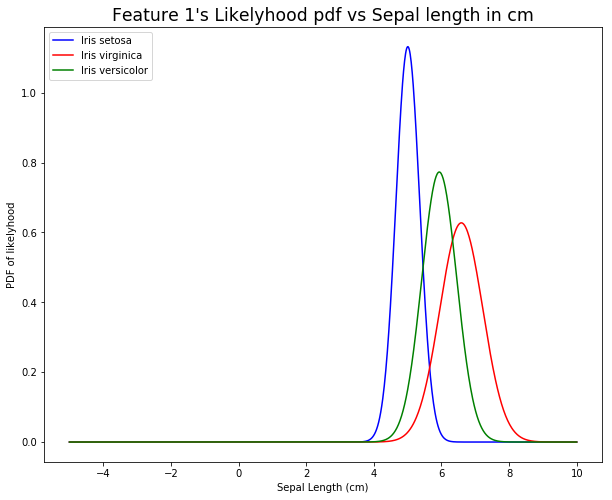

In [6]:
# I'll now plot the gaussian curves, 
# we can see the probability distribution of each feature given a particular class.

# Length in cm
x = np.linspace(-5, 10, 1000)

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.title('Feature 1\'s Likelyhood pdf vs Sepal length in cm', size='xx-large')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('PDF of likelyhood')

# Note variance is the square of the standard deviation, here sd is the required input
plt.plot(x,mlab.normpdf(x, means[1][1], math.sqrt(variances[1][1]) ), c = 'b', label = 'Iris setosa')
plt.plot(x,mlab.normpdf(x, means[2][1], math.sqrt(variances[2][1]) ), c = 'r', label = 'Iris virginica')
plt.plot(x,mlab.normpdf(x, means[3][1], math.sqrt(variances[3][1]) ), c = 'g', label = 'Iris versicolor')

plt.legend(loc=2) # 2 => leftTop ; 1 => rightTop

plt.show()

Note that pdf can be greater than 1.0, the probability in this case is the area under this graph.

# Feature 2 : Sepal Width

C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


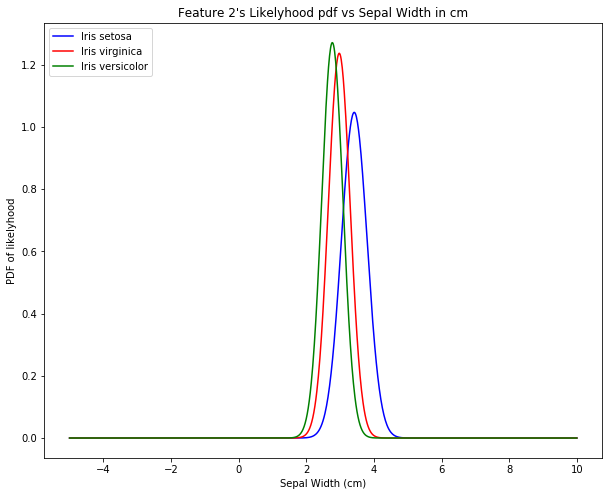

In [7]:
# Then Sepal Width (feature 2) for all 3 classes

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.plot(x,mlab.normpdf(x, means[1][2], math.sqrt(variances[1][2]) ), c = 'b', label = 'Iris setosa')
plt.plot(x,mlab.normpdf(x, means[2][2], math.sqrt(variances[2][2]) ), c = 'r', label = 'Iris virginica')
plt.plot(x,mlab.normpdf(x, means[3][2], math.sqrt(variances[3][2]) ), c = 'g', label = 'Iris versicolor')

plt.legend(loc=2)

plt.xlabel('Sepal Width (cm)')
plt.ylabel('PDF of likelyhood')
plt.title('Feature 2\'s Likelyhood pdf vs Sepal Width in cm')
plt.show()

# Feature 3 : Petal Length

C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


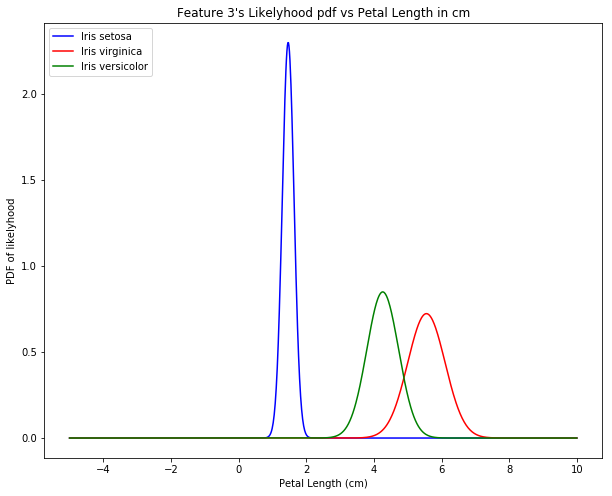

In [8]:
# Then Petal Length (feature 3) for all 3 classes

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.plot(x,mlab.normpdf(x, means[1][3], math.sqrt(variances[1][3]) ), c = 'b', label = 'Iris setosa')
plt.plot(x,mlab.normpdf(x, means[2][3], math.sqrt(variances[2][3]) ), c = 'r', label = 'Iris virginica')
plt.plot(x,mlab.normpdf(x, means[3][3], math.sqrt(variances[3][3]) ), c = 'g', label = 'Iris versicolor')

plt.legend(loc=2)

plt.xlabel('Petal Length (cm)')
plt.ylabel('PDF of likelyhood')
plt.title('Feature 3\'s Likelyhood pdf vs Petal Length in cm')

plt.show()

# Feature 4 : Petal Width

C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys
C:\Users\kovvu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


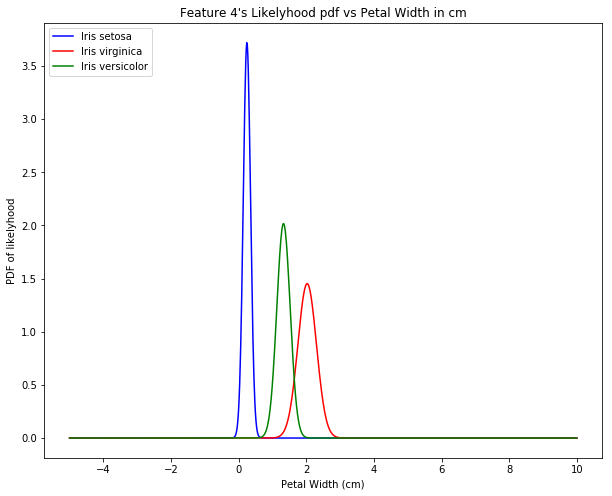

In [9]:
# Then Petal Width (feature 4) for all 3 classes

fig = plt.figure()
fig.set_size_inches(10, 8)

plt.plot(x,mlab.normpdf(x, means[1][4], math.sqrt(variances[1][4]) ), c = 'b', label = 'Iris setosa')
plt.plot(x,mlab.normpdf(x, means[2][4], math.sqrt(variances[2][4]) ), c = 'r', label = 'Iris virginica')
plt.plot(x,mlab.normpdf(x, means[3][4], math.sqrt(variances[3][4]) ), c = 'g', label = 'Iris versicolor')

plt.legend(loc=2)

plt.xlabel('Petal Width (cm)')
plt.ylabel('PDF of likelyhood')
plt.title('Feature 4\'s Likelyhood pdf vs Petal Width in cm')

plt.show()


## Posterior Probability
Now lets try to compute the posterior probability for the training set, then move on to the testing set

So we will get 3 posterier probabilities, one for each value of $i$

$$p(C_k \ | \; \mathbf {x}) \propto p(C_{k})\prod _{i=1}^{n}f(x_{i}\mid C_{k}) $$
We can calculate $p(C_k \ | \; \mathbf {x})$ by normalizing these 3 values, because each sample has to be in one of these 3 classes.

$$\sum_{k=1}^3 p(C_k \ | \; \mathbf {x}) = 1$$

In [10]:
# return f(x_i | C_k) 
# i.e. the probability density of getting "x" in feature i's prob distribution given class k
def pdfFeatureGivenClass(x,i,k):
    ourCalc = (1/math.sqrt(2*math.pi*variances[k][i]))*math.exp( (-(x-means[k][i])**2) / (2*variances[k][i]))
    scipyCalc = scipy.stats.norm( means[k][i], math.sqrt(variances[k][i]) ).pdf(x)
    
    # You might see around 10^(-16)
    #print("error in our calculation : "+str(scipyCalc-ourCalc))
    return(scipyCalc)


print(pdfFeatureGivenClass(0.1,4,1)) # Try different values

# Given a string - class name, return class no
def labelofClass(x):
    return {
        'Iris-setosa': 1,
        'Iris-virginica': 2,
        'Iris-versicolor': 3,
    }.get(x, -1)    # -1 is default if x not found

labelofClass('Iris-setosa') # Just testing it

1.5098139002655944


1

In [12]:

predictedProb = {}

# Posterior prob for Training set samples
for index, row in train.iterrows():
    print("\n\nFor the sample in the "+str(index)+"th row with id : "+str(row[0])+" the 4 features take the \nfollowing values in cm,\n")
    print("\nSepal Length : "+str(row[1])+
          "\nSepal Width : " +str(row[2])+
          "\nPetal Length : "+str(row[3])+
          "\nPetal Width : " +str(row[4]))
    
    assert (row[0] == index + 1) # Note id starts from 1 till 150 while index goes from 0 to 149
    
    actualClass = labelofClass(row[5])
    print("\nNote this sample is drawn from class no : "+str(actualClass))
    
    # p(C_k | \vec x) = predictedProb[indexOfX][k]
    preNormalized = {}
    
    # Iterate over 3 classes and 4 features
    for k in range(1,4):
        likelyhood = 1
        print("\n\n For class no "+str(k))
        for i in range(1,5):
            likelyhood = likelyhood * pdfFeatureGivenClass(row[i],i,k)
        print("\n \t the likelyhood is propotional to "+str(likelyhood))
        preNormalized[k] = classPriors[k]*likelyhood
        print("\n \t the posterior prob is propotional to "+str(preNormalized[k]))
        
    # To obtain actual posterior probabilities we normalize
    predictedProb[index] = normalize(np.array(list(preNormalized.values())).reshape(1,-1), norm='l1')
        
    print("\n Thus pre normalization the values were")
    print(preNormalized.values())
    
    print("\n After normalization we get the probabilities")
    print(predictedProb[index])
    

confArrayTrain = np.zeros((3,3))
# Classification using MAP rule
for index, row in train.iterrows():
    predictedClass = predictedProb[index].argmax() # 0 to 2 are the positions
    actualClass = labelofClass(row[5]) # 1 to 3 are the class labels
    confArrayTrain[actualClass-1][predictedClass] += 1
    
    print("Predicted : "+str(predictedClass)+" while true class : "+str(actualClass-1)+"\n\n")
    
print(confArrayTrain)
print("\n\nThe extent of rounding off errors are "+str(error))



For the sample in the 95th row with id : 96 the 4 features take the 
following values in cm,


Sepal Length : 5.7
Sepal Width : 3.0
Petal Length : 4.2
Petal Width : 1.2

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 4.407050141487298e-72

 	 the posterior prob is propotional to 1.4690167138290992e-72


 For class no 2

 	 the likelyhood is propotional to 0.00016557754522798017

 	 the posterior prob is propotional to 5.519251507599339e-05


 For class no 3

 	 the likelyhood is propotional to 0.9382365818055445

 	 the posterior prob is propotional to 0.3127455272685148

 Thus pre normalization the values were
dict_values([1.4690167138290992e-72, 5.519251507599339e-05, 0.3127455272685148])

 After normalization we get the probabilities
[[4.69633419e-72 1.76446253e-04 9.99823554e-01]]


For the sample in the 35th row with id : 36 the 4 features take the 
following values in cm,


Sepal Length : 5.0
Sepal Width : 3.2
Petal Length : 1

 	 the likelyhood is propotional to 0.33426363019238636

 	 the posterior prob is propotional to 0.11142121006412878


 For class no 3

 	 the likelyhood is propotional to 2.0484976376105735e-07

 	 the posterior prob is propotional to 6.828325458701911e-08

 Thus pre normalization the values were
dict_values([1.1647714194996186e-189, 0.11142121006412878, 6.828325458701911e-08])

 After normalization we get the probabilities
[[1.04537610e-188 9.99999387e-001 6.12838549e-007]]


For the sample in the 92th row with id : 93 the 4 features take the 
following values in cm,


Sepal Length : 5.8
Sepal Width : 2.6
Petal Length : 4.0
Petal Width : 1.2

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 1.7770982992396788e-65

 	 the posterior prob is propotional to 5.923660997465596e-66


 For class no 2

 	 the likelyhood is propotional to 4.0207967734913386e-05

 	 the posterior prob is propotional to 1.3402655911637795e-05


 For class no 3

 


 	 the likelyhood is propotional to 2.5571520697900676e-72

 	 the posterior prob is propotional to 8.523840232633559e-73


 For class no 2

 	 the likelyhood is propotional to 0.000253553656920806

 	 the posterior prob is propotional to 8.451788564026866e-05


 For class no 3

 	 the likelyhood is propotional to 1.4117303093071376

 	 the posterior prob is propotional to 0.47057676976904583

 Thus pre normalization the values were
dict_values([8.523840232633559e-73, 8.451788564026866e-05, 0.47057676976904583])

 After normalization we get the probabilities
[[1.81103491e-72 1.79572631e-04 9.99820427e-01]]


For the sample in the 122th row with id : 123 the 4 features take the 
following values in cm,


Sepal Length : 7.7
Sepal Width : 2.8
Petal Length : 6.7
Petal Width : 2.0

Note this sample is drawn from class no : 2


 For class no 1

 	 the likelyhood is propotional to 5.66644191601345e-269

 	 the posterior prob is propotional to 1.8888139720044832e-269


 For class no 2

 	 the

 	 the likelyhood is propotional to 3.2663320313023305e-24

 	 the posterior prob is propotional to 1.0887773437674434e-24


 For class no 3

 	 the likelyhood is propotional to 7.508901448219548e-17

 	 the posterior prob is propotional to 2.502967149406516e-17

 Thus pre normalization the values were
dict_values([1.8428876355803214, 1.0887773437674434e-24, 2.502967149406516e-17])

 After normalization we get the probabilities
[[1.00000000e+00 5.90799636e-25 1.35817676e-17]]


For the sample in the 58th row with id : 59 the 4 features take the 
following values in cm,


Sepal Length : 6.6
Sepal Width : 2.9
Petal Length : 4.6
Petal Width : 1.3

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 1.4551932123675066e-96

 	 the posterior prob is propotional to 4.850644041225022e-97


 For class no 2

 	 the likelyhood is propotional to 0.005447300972972112

 	 the posterior prob is propotional to 0.001815766990990704


 For class no 3

 	 th

 	 the likelyhood is propotional to 1.5417633426053927e-96

 	 the posterior prob is propotional to 5.139211142017975e-97


 For class no 2

 	 the likelyhood is propotional to 0.0036837527629471445

 	 the posterior prob is propotional to 0.0012279175876490482


 For class no 3

 	 the likelyhood is propotional to 0.4471896443079654

 	 the posterior prob is propotional to 0.14906321476932177

 Thus pre normalization the values were
dict_values([5.139211142017975e-97, 0.0012279175876490482, 0.14906321476932177])

 After normalization we get the probabilities
[[3.41950391e-96 8.17025974e-03 9.91829740e-01]]


For the sample in the 89th row with id : 90 the 4 features take the 
following values in cm,


Sepal Length : 5.5
Sepal Width : 2.5
Petal Length : 4.0
Petal Width : 1.3

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 7.314792097117884e-69

 	 the posterior prob is propotional to 2.438264032372628e-69


 For class no 2

 	 the lik

 	 the likelyhood is propotional to 0.09095050346120795

 	 the posterior prob is propotional to 0.030316834487069316

 Thus pre normalization the values were
dict_values([9.765747737477653e-43, 4.855472655133438e-08, 0.030316834487069316])

 After normalization we get the probabilities
[[3.22122420e-41 1.60157383e-06 9.99998398e-01]]


For the sample in the 65th row with id : 66 the 4 features take the 
following values in cm,


Sepal Length : 6.7
Sepal Width : 3.1
Petal Length : 4.4
Petal Width : 1.4

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 2.6211889604880857e-92

 	 the posterior prob is propotional to 8.737296534960285e-93


 For class no 2

 	 the likelyhood is propotional to 0.006266278226562538

 	 the posterior prob is propotional to 0.002088759408854179


 For class no 3

 	 the likelyhood is propotional to 0.28873882718694055

 	 the posterior prob is propotional to 0.09624627572898017

 Thus pre normalization the val

[[1.00000000e+00 2.09411948e-24 3.46277785e-17]]


For the sample in the 30th row with id : 31 the 4 features take the 
following values in cm,


Sepal Length : 4.8
Sepal Width : 3.1
Petal Length : 1.6
Petal Width : 0.2

Note this sample is drawn from class no : 1


 For class no 1

 	 the likelyhood is propotional to 4.079255513745314

 	 the posterior prob is propotional to 1.3597518379151046


 For class no 2

 	 the likelyhood is propotional to 2.679797971403086e-23

 	 the posterior prob is propotional to 8.932659904676953e-24


 For class no 3

 	 the likelyhood is propotional to 8.627374006029569e-16

 	 the posterior prob is propotional to 2.8757913353431896e-16

 Thus pre normalization the values were
dict_values([1.3597518379151046, 8.932659904676953e-24, 2.8757913353431896e-16])

 After normalization we get the probabilities
[[1.00000000e+00 6.56933100e-24 2.11493837e-16]]


For the sample in the 127th row with id : 128 the 4 features take the 
following values in cm,


Sepa


 Thus pre normalization the values were
dict_values([1.1883644658988247e-85, 0.0011988121383476932, 0.28811653787784913])

 After normalization we get the probabilities
[[4.10750576e-85 4.14361747e-03 9.95856383e-01]]


For the sample in the 4th row with id : 5 the 4 features take the 
following values in cm,


Sepal Length : 5.0
Sepal Width : 3.6
Petal Length : 1.4
Petal Width : 0.2

Note this sample is drawn from class no : 1


 For class no 1

 	 the likelyhood is propotional to 7.767018352121851

 	 the posterior prob is propotional to 2.58900611737395


 For class no 2

 	 the likelyhood is propotional to 7.082166414612209e-25

 	 the posterior prob is propotional to 2.36072213820407e-25


 For class no 3

 	 the likelyhood is propotional to 8.10839493592497e-18

 	 the posterior prob is propotional to 2.70279831197499e-18

 Thus pre normalization the values were
dict_values([2.58900611737395, 2.36072213820407e-25, 2.70279831197499e-18])

 After normalization we get the probabili

 	 the likelyhood is propotional to 0.10438885036370182

 	 the posterior prob is propotional to 0.03479628345456727


 For class no 3

 	 the likelyhood is propotional to 0.0016098208424395527

 	 the posterior prob is propotional to 0.0005366069474798509

 Thus pre normalization the values were
dict_values([8.53769759541747e-145, 0.03479628345456727, 0.0005366069474798509])

 After normalization we get the probabilities
[[2.41635980e-143 9.84812821e-001 1.51871795e-002]]


For the sample in the 97th row with id : 98 the 4 features take the 
following values in cm,


Sepal Length : 6.2
Sepal Width : 2.9
Petal Length : 4.3
Petal Width : 1.3

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 1.0820643180145024e-81

 	 the posterior prob is propotional to 3.606881060048341e-82


 For class no 2

 	 the likelyhood is propotional to 0.0015276612821272647

 	 the posterior prob is propotional to 0.0005092204273757549


 For class no 3

 	 the


Predicted : 1 while true class : 1


Predicted : 0 while true class : 0


Predicted : 1 while true class : 1


Predicted : 0 while true class : 0


Predicted : 2 while true class : 2


Predicted : 1 while true class : 1


Predicted : 0 while true class : 0


Predicted : 2 while true class : 2


Predicted : 1 while true class : 1


Predicted : 1 while true class : 2


Predicted : 0 while true class : 0


Predicted : 0 while true class : 0


Predicted : 0 while true class : 0


Predicted : 0 while true class : 0


Predicted : 2 while true class : 2


Predicted : 0 while true class : 0


Predicted : 2 while true class : 2


Predicted : 0 while true class : 0


Predicted : 1 while true class : 1


Predicted : 2 while true class : 2


Predicted : 2 while true class : 2


Predicted : 2 while true class : 2


Predicted : 0 while true class : 0


Predicted : 0 while true class : 0


Predicted : 0 while true class : 0


Predicted : 1 while true class : 1


Predicted : 1 while true class : 1




NameError: name 'error' is not defined

## Choosing a decision rule
The rule I used above is the maximum a posteriori or MAP decision rule.

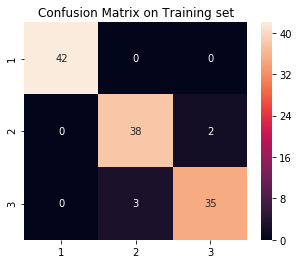

In [13]:
fig = plt.figure()
fig.set_size_inches(5, 4)

# Plotting the confusion matrix after MAP classification on training set
dfTraincm = pd.DataFrame(confArrayTrain, [1,2,3], [1,2,3])
plt.title('Confusion Matrix on Training set')
sn.heatmap(dfTraincm, annot=True)
plt.show()
# Horizontally - Actual Classes
# Vertically - Predicted Classes

In [14]:
# Classifying the testing set
posteriorProb = {}
errorRounding = 0

# Calculating posterior probability
for index, row in test.iterrows():
    print("\n\nFor the sample in the "+str(index)+"th row with id : "+str(row[0])+" the 4 features take the \nfollowing values in cm,\n")
    print("\nSepal Length : "+str(row[1])+
          "\nSepal Width : " +str(row[2])+
          "\nPetal Length : "+str(row[3])+
          "\nPetal Width : " +str(row[4]))
    
    assert (row[0] == index + 1) # Note id starts from 1 till 150 while index goes from 0 to 149
    
    actualClass = labelofClass(row[5])
    print("\nNote this sample is drawn from class no : "+str(actualClass))
    
    # p(C_k | \vec x) = predictedProb[indexOfX][k]
    preNormalized = {}
    
    # Iterate over 3 classes and 4 features
    for k in range(1,4):
        likelyhood = 1
        print("\n\n For class no "+str(k))
        for i in range(1,5):
            likelyhood = likelyhood * pdfFeatureGivenClass(row[i],i,k)
        print("\n \t the likelyhood is propotional to "+str(likelyhood))
        preNormalized[k] = classPriors[k]*likelyhood
        print("\n \t the posterior prob is propotional to "+str(preNormalized[k]))

    posteriorProb[index] = normalize(np.array(list(preNormalized.values())).reshape(1,-1), norm='l1')
        
    print("\n Thus pre normalization the values were")
    print(preNormalized.values())
    
    print("\n After normalization we get the probabilities")
    print(posteriorProb[index])
    
    errorRounding += abs(1 - posteriorProb[index].sum())
    
    print("\n --------------------------------------- \n")

confArrayTest = np.zeros((3,3))


# Classification using MAP rule
for index, row in test.iterrows():
    predictedClass = posteriorProb[index].argmax() # 0 to 2 are the positions
    actualClass = labelofClass(row[5]) # 1 to 3 are the class labels
    confArrayTest[actualClass-1][predictedClass] += 1
    
    print("Predicted : "+str(predictedClass)+" while true class : "+str(actualClass-1)+"\n\n")
    
print("\n\nThe extent of rounding off errors are "+str(error))

print(confArrayTest)



For the sample in the 27th row with id : 28 the 4 features take the 
following values in cm,


Sepal Length : 5.2
Sepal Width : 3.5
Petal Length : 1.5
Petal Width : 0.2

Note this sample is drawn from class no : 1


 For class no 1

 	 the likelyhood is propotional to 7.65991817758598

 	 the posterior prob is propotional to 2.5533060591953265


 For class no 2

 	 the likelyhood is propotional to 9.890419252305807e-24

 	 the posterior prob is propotional to 3.2968064174352688e-24


 For class no 3

 	 the likelyhood is propotional to 1.1971642589907723e-16

 	 the posterior prob is propotional to 3.9905475299692405e-17

 Thus pre normalization the values were
dict_values([2.5533060591953265, 3.2968064174352688e-24, 3.9905475299692405e-17])

 After normalization we get the probabilities
[[1.00000000e+00 1.29119124e-24 1.56289432e-17]]

 --------------------------------------- 



For the sample in the 6th row with id : 7 the 4 features take the 
following values in cm,


Sepal Lengt

 	 the likelyhood is propotional to 2.3472395672490703e-259

 	 the posterior prob is propotional to 7.824131890830233e-260


 For class no 2

 	 the likelyhood is propotional to 0.010737600069008346

 	 the posterior prob is propotional to 0.003579200023002782


 For class no 3

 	 the likelyhood is propotional to 2.6432338639699497e-14

 	 the posterior prob is propotional to 8.810779546566498e-15

 Thus pre normalization the values were
dict_values([7.824131890830233e-260, 0.003579200023002782, 8.810779546566498e-15])

 After normalization we get the probabilities
[[2.18600018e-257 1.00000000e+000 2.46166168e-012]]

 --------------------------------------- 



For the sample in the 55th row with id : 56 the 4 features take the 
following values in cm,


Sepal Length : 5.7
Sepal Width : 2.8
Petal Length : 4.5
Petal Width : 1.3

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 1.105405538107549e-88

 	 the posterior prob is propotional


 	 the likelyhood is propotional to 3.0527164393330818e-58

 	 the posterior prob is propotional to 1.0175721464443606e-58


 For class no 2

 	 the likelyhood is propotional to 3.189614535683659e-06

 	 the posterior prob is propotional to 1.0632048452278863e-06


 For class no 3

 	 the likelyhood is propotional to 0.3649429851879394

 	 the posterior prob is propotional to 0.12164766172931313

 Thus pre normalization the values were
dict_values([1.0175721464443606e-58, 1.0632048452278863e-06, 0.12164766172931313])

 After normalization we get the probabilities
[[8.36484022e-58 8.73995881e-06 9.99991260e-01]]

 --------------------------------------- 



For the sample in the 88th row with id : 89 the 4 features take the 
following values in cm,


Sepal Length : 5.6
Sepal Width : 3.0
Petal Length : 4.1
Petal Width : 1.3

Note this sample is drawn from class no : 3


 For class no 1

 	 the likelyhood is propotional to 8.76535660568489e-72

 	 the posterior prob is propotional to 2.9

NameError: name 'error' is not defined

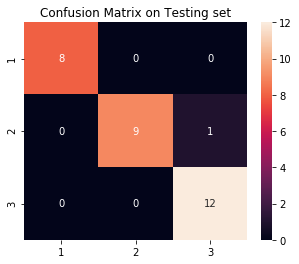

In [15]:
fig = plt.figure()
fig.set_size_inches(5,4)

# Testing Set confusion
dfTestcm = pd.DataFrame(confArrayTest, [1,2,3], [1,2,3])
plt.title('Confusion Matrix on Testing set')
sn.heatmap(dfTestcm, annot=True)
plt.show()


Other than the confusion matrix we can use Micro and Macro averaged F1 measure.

For now lets try computing empirical error rate or misclassification rate,

Let $g$ be a classifier, and $x_i$ and $y_i$ be respectively an instance in your test dataset and its actual class. If $n$ such examples exist in the testing set then,

$$err(g)= \frac{1}{n} \sum_{i≤n}1_{g(x_i)≠y_i}$$
So this is the fraction of incorrectly classfied classes.

But this measure gives equal importance to all classes, but we should give more importance to underrepresented classes.

In [16]:
print(confArrayTest)
totalTest = test.count()[0]
emperror = 0

for i in range(3):
    for j in range(3):
        if(i == j):
            continue
        emperror = emperror + confArrayTest[i][j]
        
# Unweighted empirical error
print("\n \n The Misclassification rate is "+str(emperror/totalTest)+" \n")


print(train['Species'].value_counts())
print(test['Species'].value_counts())

[[ 8.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  0. 12.]]

 
 The Misclassification rate is 0.03333333333333333 

Iris-setosa        42
Iris-virginica     40
Iris-versicolor    38
Name: Species, dtype: int64
Iris-versicolor    12
Iris-virginica     10
Iris-setosa         8
Name: Species, dtype: int64


## Motivation for the independence assumption
Now note how we used the Naive independence assumption - the assumption that each feature is conditionally independent of each other given the class in order to avoid modelling likelyhood as a multivariate distribution, rather we could now model it as $n$ univariate distributions.

We could argue that the Curse of dimensionality is why we do this. This is a great article for further reading.

Consider we form a histogram with only sepal length as a feature, we can discretize the values to say 0.1 cm widths. Then we would have maybe around 20 bins.

Once we add a new feature sepal width into the fray now we have $20\times20$ number of bins! See how sparse the available data becomes? We don't observe many important combinations. So with a fixed number of training samples, the predictive power reduces as the dimensionality increases.

So if we have $m$ bins and $n$ features, instead of $m^n$ bins we only have $m\times n$ bins if we go for $n$ univariate distributions.

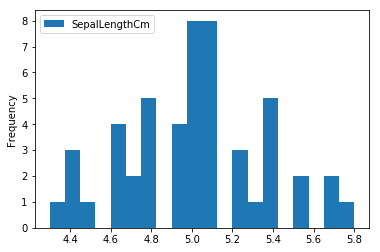

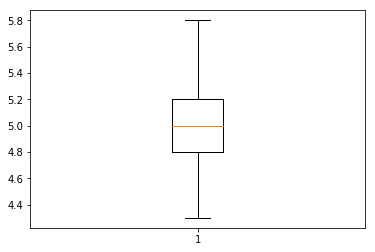

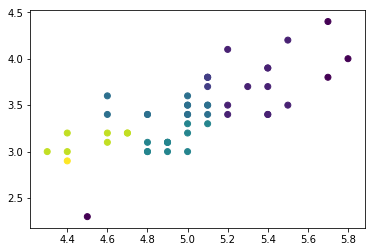

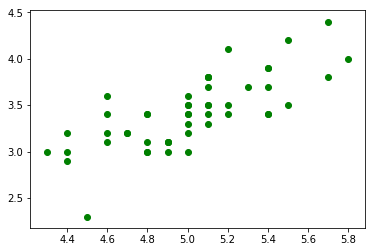

[ 4.  5. 10. 10.  4.  1.  4.  4. 11.  5.  1.  4.  5. 10.  0.  0.  1.  4.
  0.  2.  1.  2.  4.  5.  4.  5.  4.  1.  1. 10.  5.  1.  1.  1.  5.  5.
  1.  5. 10.  4.  4.  0. 10.  4.  2.  5.  2. 10.  1.  5.]


In [17]:
# take only one feature
oneFeatureSetosa = dfClasses["Iris-setosa"][['SepalLengthCm','Species']]
oneFeatureSetosa.plot.hist(bins=20)
plt.legend(loc=2)
plt.show()

plt.boxplot(oneFeatureSetosa['SepalLengthCm'].values)
plt.show()

twoFeatureSetosa = dfClasses["Iris-setosa"][['SepalLengthCm', 'SepalWidthCm', 'Species']]
x = twoFeatureSetosa['SepalLengthCm'].values
y = twoFeatureSetosa['SepalWidthCm'].values

lenEdges, widthEdges = np.linspace(2.5, 6.5, 10), np.linspace(2, 5, 10)
hist, lenEdges, widthEdges = np.histogram2d(x, y, (lenEdges, widthEdges))
xidx = np.clip(np.digitize(x, lenEdges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, widthEdges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]
plt.scatter(x, y, c=c)
plt.show()
plt.scatter(x, y, c='g')
plt.show()

print(c)


But let us try using a bayesian classifier without the naive independence assumptions.

So in the orginal bayes equation,

$$ p(C_{k} \ | \ \mathbf {x}) = \frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x})} = \frac {p(\mathbf {x} , C_{k})}{p(\mathbf {x})}$$
Here we can model $p(\mathbf {x} \mid C_{k})$ as a multivariate guassian distribution, so we have two parameters we need to compute the mean vector $\boldsymbol\mu_k$ and the covariance matrix ($ \boldsymbol\Sigma_k$) for each class. Note there are $n$ features.

$$p(\mathbf {x} \mid C_{k}) \sim\ \mathcal{N}(\boldsymbol\mu_k,\, \boldsymbol\Sigma_k)$$
The P.D.F of this distribution is,

$$\Large f(\mathbf {x} \; \ | \; \boldsymbol\mu_k , \boldsymbol\Sigma_k) = \frac{e^{\frac{ {(\mathbf {x}-\boldsymbol\mu_k)}^T {\boldsymbol\Sigma_k}^{\mathbf{-1}}(\mathbf {x} - \boldsymbol\mu_k)  }{2}}}{\sqrt{{2\pi}^n |\boldsymbol\Sigma_k|}}$$